In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp

import numpy as np


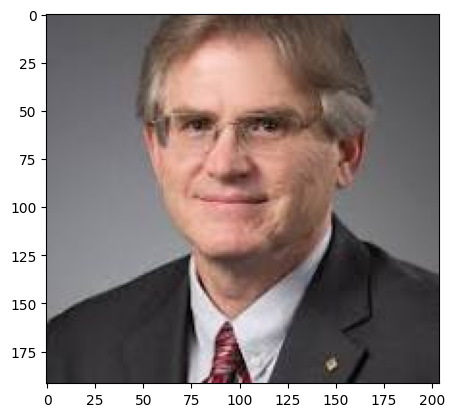

In [2]:
faculty = cv2.imread(os.path.relpath('../../Data/AlanGeorge.jpeg'))
faculty = cv2.cvtColor(faculty,cv2.COLOR_BGR2RGB)

plt.imshow(faculty)

In [3]:
BaseOptions = mp.tasks.BaseOptions
FaceDetector = mp.tasks.vision.FaceDetector
FaceDetectorOptions = mp.tasks.vision.FaceDetectorOptions
VisionRunningMode = mp.tasks.vision.RunningMode

# Create a face detector instance with the image mode:
options = FaceDetectorOptions(
    base_options=BaseOptions(model_asset_path='blaze_face_short_range.tflite'),
    running_mode=VisionRunningMode.IMAGE)

mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=faculty)
detector=FaceDetector.create_from_options(options)

face_detector_result = detector.detect(mp_image)

I0000 00:00:1731261907.474809  494117 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-20.7.3), renderer: Intel(R) Iris(TM) Plus Graphics 640
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1731261907.486990  494717 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [7]:
from typing import Tuple, Union
import math

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def _normalized_to_pixel_coordinates(
    normalized_x: float, normalized_y: float, image_width: int,
    image_height: int) -> Union[None, Tuple[int, int]]:
  """Converts normalized value pair to pixel coordinates."""

  # Checks if the float value is between 0 and 1.
  def is_valid_normalized_value(value: float) -> bool:
    return (value > 0 or math.isclose(0, value)) and (value < 1 or
                                                      math.isclose(1, value))

  if not (is_valid_normalized_value(normalized_x) and
          is_valid_normalized_value(normalized_y)):
    # TODO: Draw coordinates even if it's outside of the image bounds.
    return None
  x_px = min(math.floor(normalized_x * image_width), image_width - 1)
  y_px = min(math.floor(normalized_y * image_height), image_height - 1)
  return x_px, y_px

def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes and keypoints on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  annotated_image = image.copy()
  height, width, _ = image.shape

  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(annotated_image, start_point, end_point, TEXT_COLOR, 3)

    # Draw keypoints
    for keypoint in detection.keypoints:
      keypoint_px = _normalized_to_pixel_coordinates(keypoint.x, keypoint.y,
                                                     width, height)
      color, thickness, radius = (0, 255, 0), 2, 2
      cv2.circle(annotated_image, keypoint_px, thickness, color, radius)

    # Draw label and score
    for idx in range(0,len(detection.categories)):
      category = detection.categories[idx]
      category_name = category.category_name
      category_name = '' if category_name is None else category_name
      probability = round(category.score, 2)
      result_text = category_name + ' (' + str(probability) + ')'
      text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
      cv2.putText(annotated_image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return annotated_image

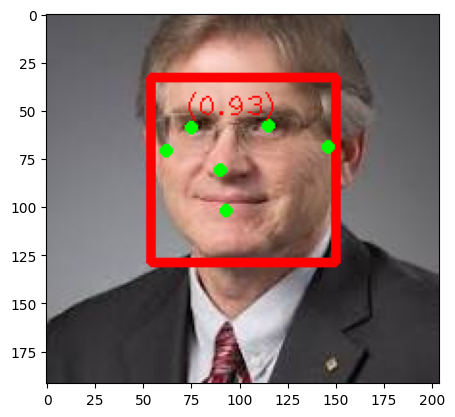

In [8]:
im=visualize(mp_image.numpy_view(),face_detector_result)
plt.imshow(im)

In [6]:
# 0: mp_face_detection.FaceKeyPoint.RIGHT_EYE
# 1: mp_face_detection.FaceKeyPoint.LEFT_EYE
# 2: mp_face_detection.FaceKeyPoint.NOSE_TIP
# 3: mp_face_detection.FaceKeyPoint.MOUTH_CENTER
# 4: mp_face_detection.FaceKeyPoint.RIGHT_EAR_TRAGION
# 5: mp_face_detection.FaceKeyPoint.LEFT_EAR_TRAGION

    